# SuSiE_Coloc

Susie Coloc package is used to perform genetic colocalization analysis of two related phenotypes to see if they share common genetic causal variants in a region

It combines SuSiE and Coloc

## Input files

It needs the summary of SuSiE for all the traits we want to analyse

So we need to perform the fine mapping with Susie for both the trait. 

## SuSiE_RSS_Diana.ipynb

After applying LD_Clumping.ipynb and Region_Extraction.ipynb to select regions that overlap between traits, the current pipeline focuses on SuSiE to do fine mapping of those regions to see if theres something of interest.

To run this notebook follow the example:

### example with f3393_hearing_aid

### then run SusiEColoc starting from the summary of SusiE 

In [14]:
if(!require("remotes"))
   install.packages("remotes") # if necessary
library(remotes)
install_github("chr1swallace/coloc")

Loading required package: remotes




plyr         (1.8.7      -> 1.8.8     ) [CRAN]
RcppArmad... (0.11.4.0.1 -> 0.11.4.2.1) [CRAN]
vctrs        (0.4.2      -> 0.5.1     ) [CRAN]
ggplot2      (3.3.6      -> 3.4.0     ) [CRAN]
mixsqp       (0.3-43     -> 0.3-48    ) [CRAN]
matrixStats  (0.62.0     -> 0.63.0    ) [CRAN]
data.table   (1.14.4     -> 1.14.6    ) [CRAN]


Installing 7 packages: plyr, RcppArmadillo, vctrs, ggplot2, mixsqp, matrixStats, data.table

Installing packages into ‘/mnt/mfs/hgrcgrid/homes/fr2540/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/3165322.1.all.q/RtmpCcbynL/remotes182340cdfa3d/chr1swallace-coloc-27bed11/DESCRIPTION’ ... OK
* preparing ‘coloc’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘coloc_5.2.0.tar.gz’



Installing package into ‘/mnt/mfs/hgrcgrid/homes/fr2540/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [ ]:
if(requireNamespace("susieR",quietly=TRUE)) {
  susie.res=coloc.susie(S3,S4)
  print(susie.res$summary)
}

# MWE 

In [1]:
library(coloc)
data(coloc_test_data)
attach(coloc_test_data)

This is a new update to coloc.



coloc has adopted the SuSiE framework for fine mapping in the presence of multiple causal variants. This framework requires the LD matrix is known, so first check our datasets hold an LD matrix of the right format. =check_dataset= should return NULL if there are no problems, or print informative error messages if there are.

In [3]:
check_dataset(D3,req="LD")
check_dataset(D4,req="LD")

NULL

NULL

SuSiE can take a while to run on larger datasets, so it is best to run once per dataset with the =runsusie= function, store the results and feed those into subsequent analyses. =runsusie= is just a wrapper around the =susie_rss= function in the susieR package that automates running until convergence and saves a little extra information about snp names to make subsequent coloc processing simpler. Here, it does indeed find two signals for dataset D3 (there are two rows in the credible sets summary) and one for dataset D4.

In [4]:
S3=runsusie(D3) 

running max iterations: 100


	converged: TRUE



In [7]:
summary(S3)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
5,5,9.906843e-01,1
38,38,6.705263e-01,2
43,43,1.391875e-01,2
41,41,7.184442e-02,2
44,44,5.385962e-02,2
49,49,4.166083e-02,2
40,40,1.470633e-02,-1
6,6,9.327482e-03,-1
36,36,3.497065e-03,-1


In [8]:
S4=runsusie(D4)

running max iterations: 100


	converged: TRUE



In [9]:
summary(S4)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
5,5,0.95178636,1
1,1,0.05958541,-1
6,6,0.02794859,-1
31,31,0.02281100,-1
29,29,0.02216706,-1
28,28,0.02169471,-1
33,33,0.02164331,-1
24,24,0.02091191,-1
25,25,0.02077979,-1


With these susie output objects stored, we can colocalise every pair of signals. This analysis says the first pair, tagged by s25.1 and s25 for datasets D3 and D4, do not colocalise (posterior for H3 is close to 1), whilst the second pair, tagged by the same SNP, s25, for both datasets, do (posterior for H4 is close to 1).

### Run Susie.coloc for both the summary

In [17]:
if(requireNamespace("susieR",quietly=TRUE)) {
  susie.res=coloc.susie(S3,S4)
  print(susie.res$summary)
}

Using 50/ 50 and 50 available



PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.68e-14  1.03e-07  5.51e-10  1.23e-04  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-05  3.75e-05  2.24e-01  7.72e-01  4.14e-03 
[1] "PP abf for shared variant: 0.414%"
   nsnps hit1 hit2    PP.H0.abf    PP.H1.abf    PP.H2.abf    PP.H3.abf
1:    50   s5   s5 2.681604e-14 1.032284e-07 5.514394e-10 0.0001230134
2:    50  s38   s5 1.089658e-05 3.752945e-05 2.240750e-01 0.7717393815
     PP.H4.abf idx1 idx2
1: 0.999876883    1    1
2: 0.004137205    2    1


Note that because we are doing multiple colocalisations, sensitivity() needs to know which to consider, and we need to give it the datasets used if we want to see the Manhattan plots.

Results pass decision rule H4 > 0.9

Results fail decision rule H4 > 0.9



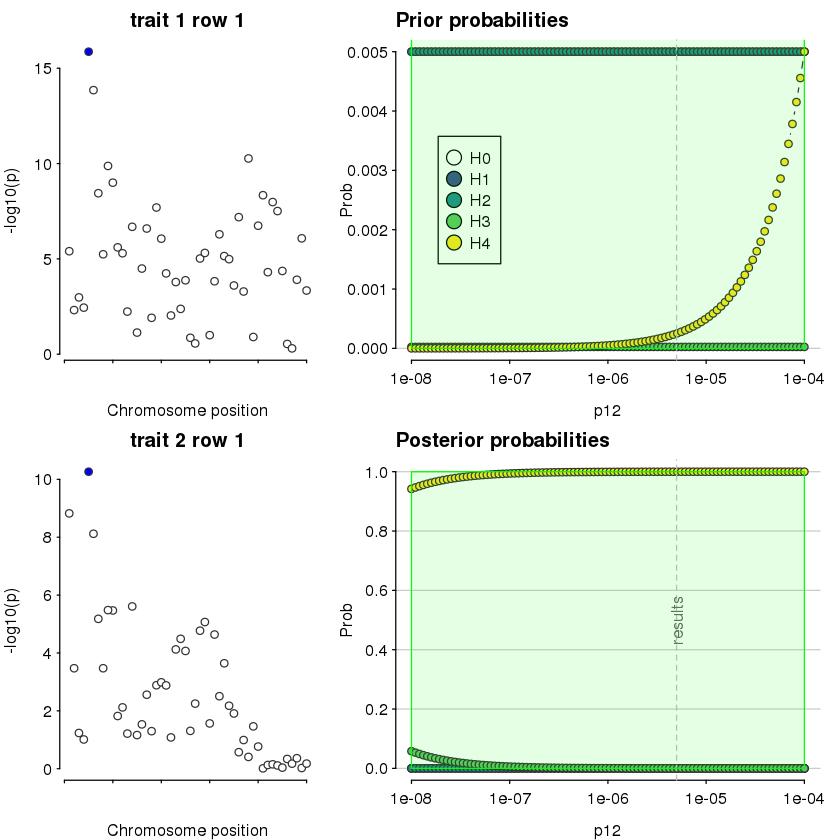

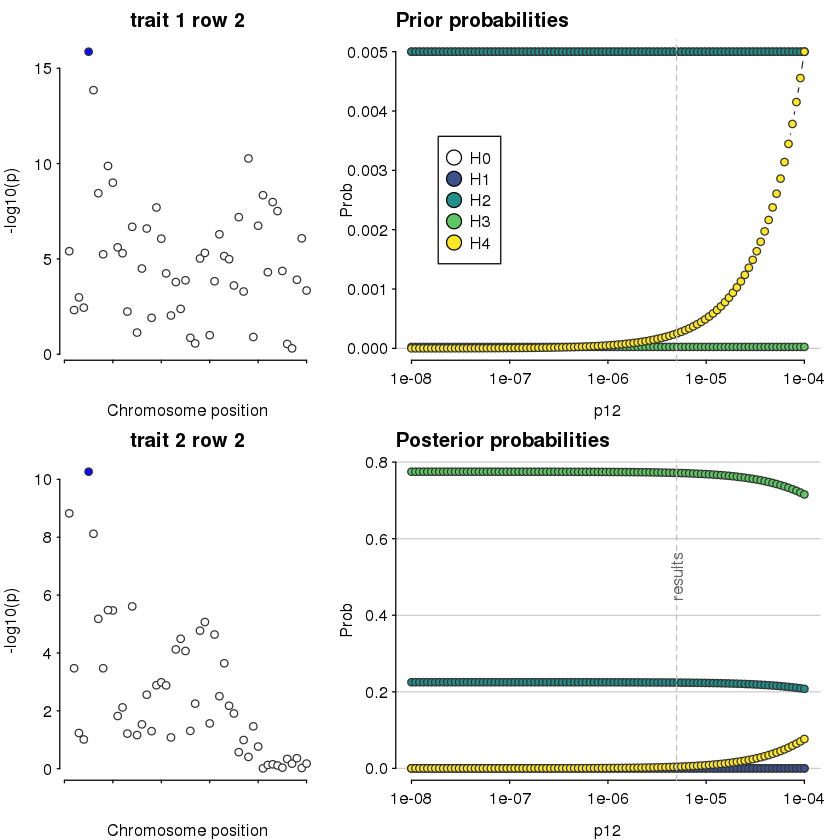

In [18]:
if(requireNamespace("susieR",quietly=TRUE)) {
  sensitivity(susie.res,"H4 > 0.9",row=1,dataset1=D3,dataset2=D4)
  sensitivity(susie.res,"H4 > 0.9",row=2,dataset1=D3,dataset2=D4)
}

## Important notes on running SuSiE

runsusie() is a wrapper around susieR::susie_rss(). It sets the null_weight parameter - this must be non-zero or we cannot back calculate Bayes factors needed for coloc - adds some colnames to the returned objects (so that snps can be identified easily) and repeats the calls to susie_rss() until convergence is achieved. In particular, the null_weight is by default set to an (implausibly) small value of 11+nsnps. This ensures that we get a posterior probability for the null hypothesis of no association, so we can calculate Bayes factors when needed, but also, by setting such a low value, allows us to capture weak signals that would not be detected if null_weight is large. For coloc purposes, this is fine, because we will include in the coloc step our real prior for a SNP to be causally associated (and by implication our prior belief that no SNPs are causally associated). At this stage, weak signals will get weeded out.

You can also pass that per-SNP prior to runsusie() by setting the parameter p (equivalent to p1 or p2 in coloc functions). But be aware either option differs from the default behaviour of susie_rss() which is not to specify a prior for the null hypothesis at all.

susie_rss() has many other options and you should look at them if runsusie() is not giving the output you expect. They can be passed directly through runsusie().



In [19]:
if(requireNamespace("susieR",quietly=TRUE)) {
  ?susieR::susie_rss
}

susie_rss {susieR},R Documentation
z,p-vector of z-scores.
R,p x p correlation matrix.
n,The sample size.
bhat,"Alternative summary data giving the estimated effects (a vector of length p). This, together with shat, may be provided instead of z."
shat,"Alternative summary data giving the standard errors of the estimated effects (a vector of length p). This, together with bhat, may be provided instead of z."
var_y,"The sample variance of y, defined as y'y/(n-1). When the sample variance is not provided, the coefficients (returned from coef) are computed on the “standardized” X, y scale."
z_ld_weight,"This parameter is included for backwards compatibility with previous versions of the function, but it is no longer recommended to set this to a non-zero value. When z_ld_weight > 0, the matrix R is adjusted to be cov2cor((1-w)*R + w*tcrossprod(z)), where w = z_ld_weight."
estimate_residual_variance,"The default is FALSE, the residual variance is fixed to 1 or variance of y. If the in-sample LD matrix is provided, we recommend setting estimate_residual_variance = TRUE."
prior_variance,"The prior variance(s) for the non-zero noncentrality parameterss \tilde{b}_l. It is either a scalar, or a vector of length L. When the susie_suff_stat option estimate_prior_variance is set to TRUE (which is highly recommended) this simply provides an initial value for the prior variance. The default value of 50 is simply intended to be a large initial value. Note this setting is only relevant when n is unknown. If n is known, the relevant option is scaled_prior_variance in susie_suff_stat."
check_prior,"When check_prior = TRUE, it checks if the estimated prior variance becomes unreasonably large (comparing with 100 * max(abs(z))^2)."


One option I have varied to help SuSiE detect weaker signals, is the coverage parameter. By default susie_rss looks for signals for which it can form a 95% credible set. By reducing the coverage, we can find weaker signals. For example we find nothing in this weaker signal dataset

running max iterations: 100


	converged: TRUE



,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
5,5,0.903390231,1
38,38,0.309983745,-1
43,43,0.154342490,-1
41,41,0.111948787,-1
44,44,0.099238891,-1
6,6,0.096305832,1
49,49,0.087804552,-1
40,40,0.052822365,-1
36,36,0.027272492,-1


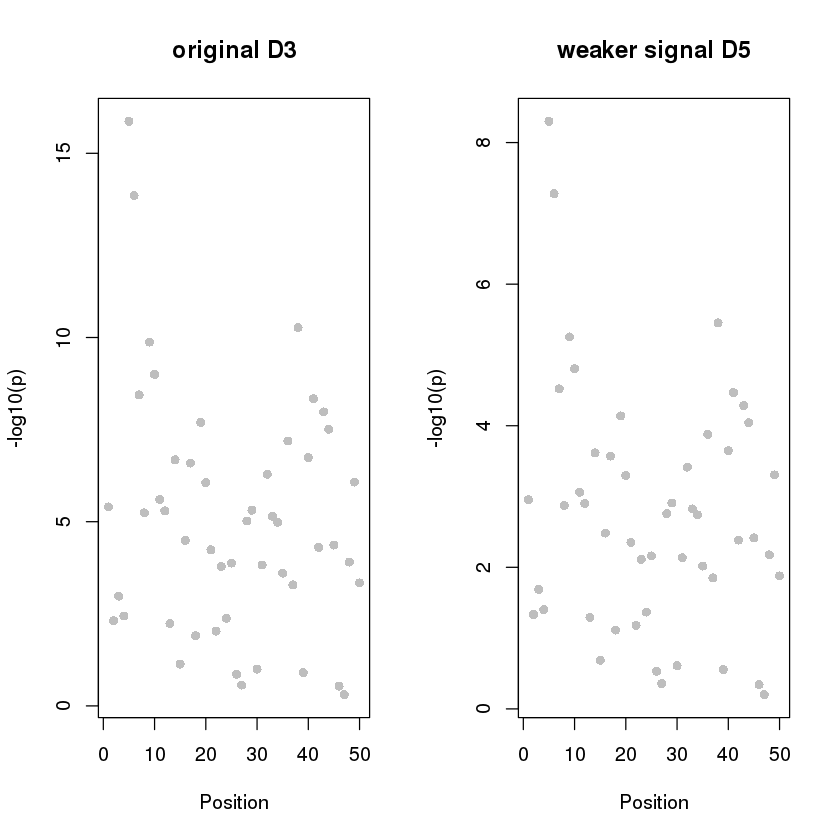

In [20]:
if(requireNamespace("susieR",quietly=TRUE)) {
  ## make a dataset with a weaker signal
  D5=D3
  D5$varbeta=D5$varbeta * 2
  D5$N=D5$N / 2
  par(mfrow=c(1,2))
  plot_dataset(D3, main="original D3")
  plot_dataset(D5, main="weaker signal D5")
  summary(runsusie(D5)) # default coverage 0.95
}

But by reducing the coverage we can find one signal

In [21]:
if(requireNamespace("susieR",quietly=TRUE)) {
  summary(runsusie(D5,coverage=0.1))  # lower coverage
}

running max iterations: 100


	converged: TRUE



,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
5,5,0.903390231,1
38,38,0.309983745,2
43,43,0.154342490,-1
41,41,0.111948787,-1
44,44,0.099238891,-1
6,6,0.096305832,-1
49,49,0.087804552,-1
40,40,0.052822365,-1
36,36,0.027272492,-1


And reducing it further finds the other as well

In [22]:
if(requireNamespace("susieR",quietly=TRUE)) {
  summary(runsusie(D5,coverage=0.01)) # even lower
}

running max iterations: 100


	converged: TRUE



,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
5,5,0.903390231,1
38,38,0.309983745,2
43,43,0.154342490,-1
41,41,0.111948787,-1
44,44,0.099238891,-1
6,6,0.096305832,-1
49,49,0.087804552,-1
40,40,0.052822365,-1
36,36,0.027272492,-1


These values are just for illustration, I probably wouldn’t believe a signal in a real dataset with a p>10−5. They let you find weaker signals, but the coloc results should be treated with caution.

In [23]:
if(requireNamespace("susieR",quietly=TRUE)) {
  S5=runsusie(D5,coverage=0.1)  # lower coverage
  summary(S5)
  res=coloc.susie(S5,S4)
  print(res$summary)
}

running max iterations: 100


	converged: TRUE

Using 50/ 50 and 50 available



PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.34e-09  1.13e-07  1.10e-04  3.26e-04  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.66e-05  1.04e-06  9.58e-01  2.14e-02  2.06e-02 
[1] "PP abf for shared variant: 2.06%"
   nsnps hit1 hit2    PP.H0.abf    PP.H1.abf    PP.H2.abf    PP.H3.abf
1:    50   s5   s5 5.343692e-09 1.130931e-07 0.0001098865 0.0003264957
2:    50  s38   s5 4.658445e-05 1.040602e-06 0.9579528575 0.0213574399
    PP.H4.abf idx1 idx2
1: 0.99956350    1    1
2: 0.02064208    2    1


### Run SusieR to get summarystats _#see pipeline for SusieR in Bioworflows